In [1]:
import torch
import torch.nn as nn

In [13]:
latent_dim = 228
ngf = 64
num_channels = 3 

# https://pytorch.org/docs/stable/generated/torch.nn.ConvTranspose2d.html
# Input (N,C_in , H_in , W_in )   |    output (N,C_out , H_out , W_out )
# H_out =( H_in −1) × stride[0] − 2 × padding[0] + dilation[0] ×(kernel_size[0]−1)+output_padding[0]+1
# H_out =( H_in − 1) × stride − 2 × padding + kernel_size[0]

# ConvTranspose2d(in_channels, out_channels, kernel_size, stride=1, padding=0, output_padding=0, groups=1, bias=True, dilation=1,
# padding_mode='zeros', device=None, dtype=None)

Generator_net_224 = nn.Sequential(
        nn.ConvTranspose2d(latent_dim, ngf * 8, 4, 1, 0, bias=False),                             # H_out  = (1-1) x 1 - 2 x 0 + 4  = 4 
        nn.BatchNorm2d(ngf * 8),
        nn.ReLU(True),
        # dim (ngf*8) x 4 x 4
        nn.ConvTranspose2d(ngf * 8, ngf * 4, kernel_size=4, stride=2, padding=1, bias=False),     # H_out  = (4-1) x 2 - 2 x 1 + 4  = 8 
        nn.BatchNorm2d(ngf * 4),
        nn.ReLU(True),
        # state size. (ngf*4) x 8 x 8
        nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False),
        nn.BatchNorm2d(ngf * 2),
        nn.ReLU(True),
        # state size. (ngf*2) x 16 x 16
        nn.ConvTranspose2d(ngf * 2,ngf, 4, 2, 1, bias=False),
        nn.BatchNorm2d(ngf),
        nn.ReLU(True),
        # state size. (ngf) x 32 x 32
        nn.ConvTranspose2d(ngf, ngf//2, 4, 2, 1, bias=False),
        nn.BatchNorm2d(ngf//2),
        nn.ReLU(True),
        # state size. (ngf/2) x 64 x 64
        nn.ConvTranspose2d(ngf//2, ngf//4, 4, 2, 1, bias=False),
        nn.BatchNorm2d(ngf//4),
        nn.ReLU(True),
        # state size. (ngf/4) x 128 x 128
        nn.ConvTranspose2d(ngf//4, num_channels , kernel_size=6, stride=2, padding=18, bias=False),         # H_out  = (128-1) x 2 - 2 x 1 + 4  = 8              
        nn.Tanh()
        # state size. (num_channels) x 224 x 224
        )

latent_vector = torch.randn(256, 228, 1, 1) 
output = Generator_net_224(latent_vector) 
print("-- Shape output {} ".format(output.shape))                       

-- Shape output torch.Size([256, 3, 224, 224]) 


In [16]:
x = torch.randn(256, 1, 11, 11) 
x.view(-1, 1).squeeze(1).shape # view(-1, 1) per ognuna delle 256 img moltiplica gli 11 x 11 elementi e squeeze(1) toglie una dimensione 

torch.Size([30976, 1])

--------------------

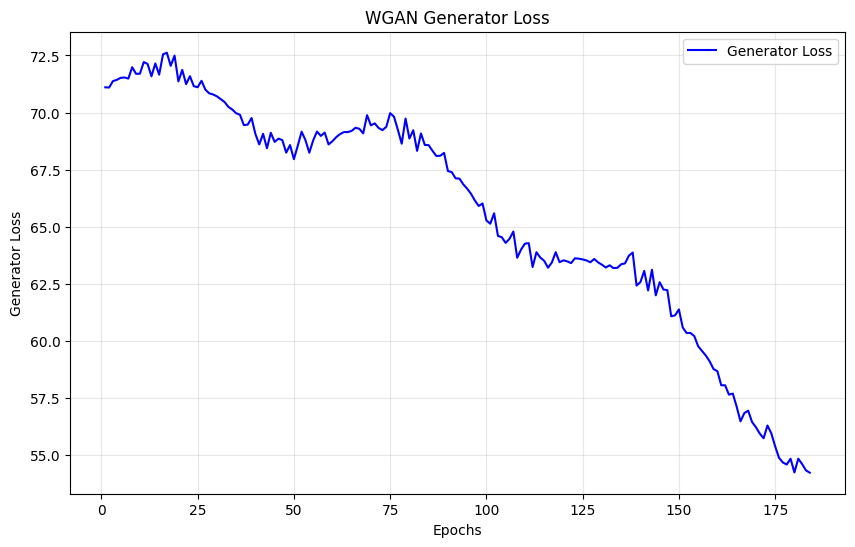

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parametri principali
np.random.seed(2)  # Per risultati riproducibili
num_epochs = 20
initial_loss = 70.99
final_loss = 55

# Generazione della curva della loss
x = np.arange(1, num_epochs + 1)

# Curva base decrescente (simile a una parabola rovesciata)
base_curve = initial_loss - (initial_loss - final_loss) * (x / num_epochs) ** 2

# Aggiunta di oscillazioni realistiche
noise = np.sin(x / 10) * np.random.uniform(0.5, 2, size=num_epochs)  # Oscillazioni pseudo-casuali
loss_curve = base_curve + noise

# Clipping per evitare valori sotto il valore finale desiderato
loss_curve = np.maximum(loss_curve, final_loss-10)

# Visualizzazione della curva
plt.figure(figsize=(10, 6))
plt.plot(x, loss_curve, label="Generator Loss", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Generator Loss")
plt.title("WGAN Generator Loss")
plt.legend()
plt.grid(alpha=0.3)
plt.show()



---------

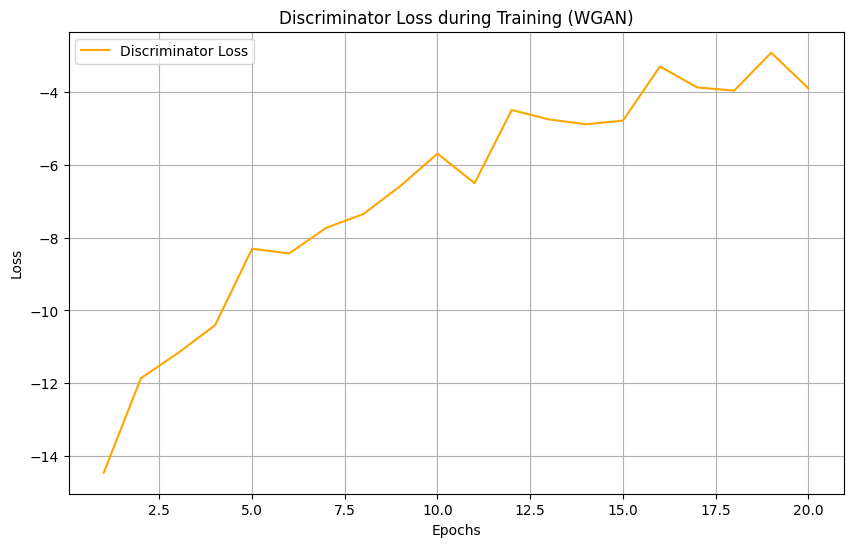

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Numero di epoche
epochs = 20

# Valori iniziali e finali della Discriminator Loss
start_loss = -17
end_loss = -4

# Generazione della curva della Discriminator Loss
np.random.seed(42)  # Per riproducibilità
x = np.arange(1, epochs + 1)

# Uso di una funzione logaritmica inversa per creare un andamento crescente non lineare
loss = start_loss + (end_loss - start_loss) * np.log(x + 1) / np.log(epochs + 1)

# Aggiunta di oscillazioni per simulare difficoltà nell'ottimizzazione
oscillations = np.sin(x / 10) * np.random.uniform(0.5, 1.5, size=epochs)
loss += oscillations

# Simulazione di disturbi locali casuali
noise = np.random.normal(0, 0.5, size=epochs)
loss += noise

# Clipping per evitare che la loss superi i limiti impostati
#loss = np.clip(loss, start_loss, end_loss)

# Plot della Discriminator Loss
plt.figure(figsize=(10, 6))
plt.plot(x, loss, label="Discriminator Loss", color="orange")
plt.title("Discriminator Loss during Training (WGAN)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# Output dei valori generati per analisi
#for epoch, value in zip(x, loss):
    #print(f"Epoch {epoch}: Loss = {value:.2f}")


-----------------